In [261]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
from scipy.spatial.distance import directed_hausdorff

# Create Template

(np.float64(-0.5), np.float64(3023.5), np.float64(3023.5), np.float64(-0.5))

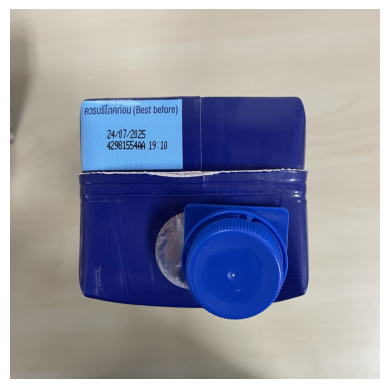

In [262]:
# Load the image
image = cv2.imread('../data/large/IMG_E0107.jpg')

plt.imshow(image[:,:,::-1])
plt.axis('off')

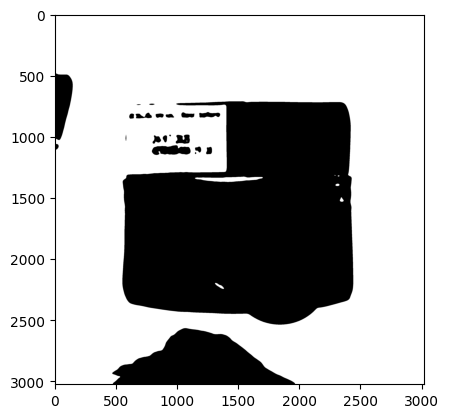

In [263]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise (optional for Otsu's method)
blur = cv2.GaussianBlur(gray, (75, 75), 0)

# Apply Otsu's thresholding
ret, binary = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')

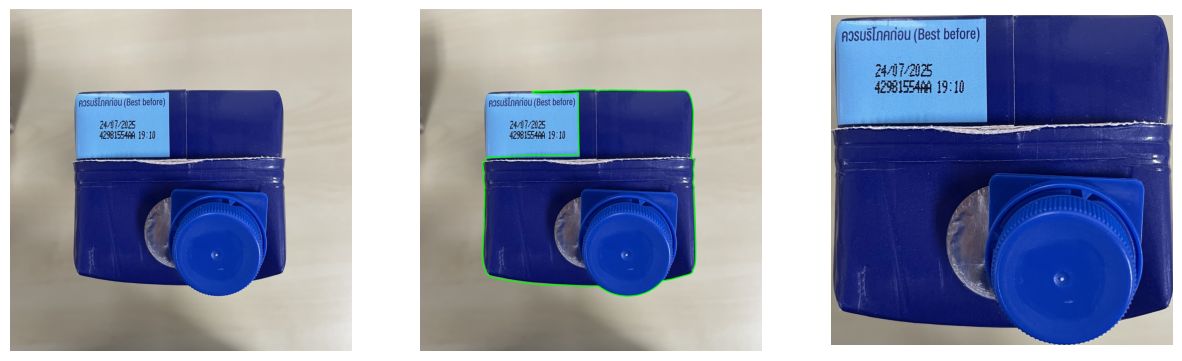

In [264]:
edges = cv2.Canny(binary, threshold1=50, threshold2=150)
# find max contours
contours, hierarchy = cv2.findContours(edges,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
template_contour = max(contours, key=cv2.contourArea)

# Draw the contour on the image
roi_contour = cv2.drawContours(image.copy(), template_contour, -1, (0, 255, 0), 10)

plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.imshow(image[:,:,::-1])
plt.axis('off')

plt.subplot(132)
plt.imshow(roi_contour[:,:,::-1])
plt.axis('off')
# Step 4: Get the bounding box of the template contour
x, y, w, h = cv2.boundingRect(template_contour)
offset = 0
# Step 5: Crop the image based on the bounding box
cropped_image = image[y+offset:y+h-offset, x+offset:x+w-offset]

# Step 6: Display the cropped image
plt.subplot(133)
plt.imshow(cropped_image[:,:,::-1])  # Convert BGR to RGB for displaying with matplotlib
plt.axis('off')

plt.show()

# OCR

# Metallic

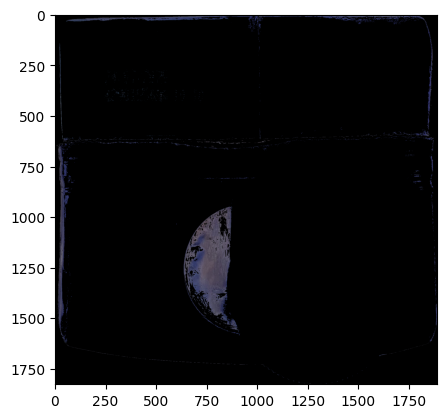

In [265]:
# Convert to HSV color space
hsv_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)

lower = np.array([70, 30, 70])
upper = np.array([255, 150, 120])

# Create a mask for the specific color range
mask = cv2.inRange(hsv_image, lower, upper)

# Bitwise AND to extract the color from the original image
result = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)

plt.imshow(result[:,:,::-1])

In [266]:
gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur to reduce noise (optional for Otsu's method)
blur_result = cv2.GaussianBlur(gray_result, (55, 55), 0)

# Apply Otsu's thresholding
ret, binary_result = cv2.threshold(blur_result, 0, 255, cv2.THRESH_BINARY)

In [267]:
edges_result = cv2.Canny(binary_result, threshold1=50, threshold2=300)
# find max contours
contours, hierarchy = cv2.findContours(edges_result,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
template_contour_result = max(contours, key=cv2.contourArea)

# Draw the contour on the image
roi_contour_result = cv2.drawContours(result.copy(), template_contour_result, -1, (0, 255, 0), 10)
3
# Step 4: Get the bounding box of the template contour
x, y, w, h = cv2.boundingRect(template_contour_result)
offset = 0
# Step 5: Crop the image based on the bounding box
cropped_image_result = result[y+offset:y+h-offset, x+offset:x+w-offset]


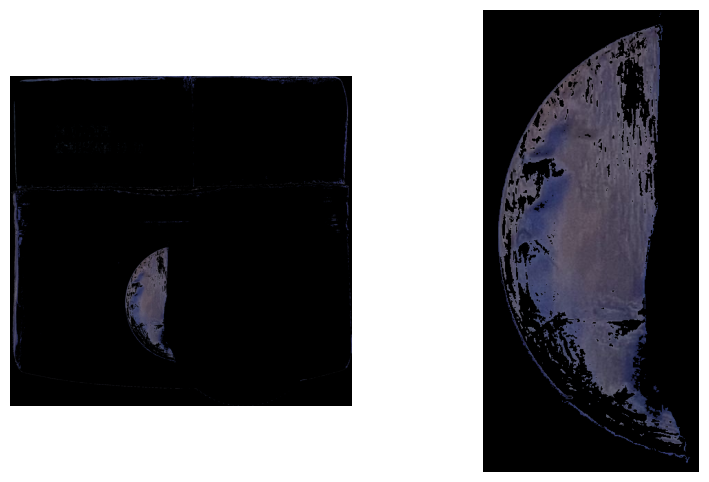

In [268]:
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.axis('off')
plt.imshow(result[:,:,::-1])

# plt.subplot(132)
# plt.axis('off')
# plt.imshow(roi_contour_result[:,:,::-1])

# Step 6: Display the cropped image
plt.subplot(132)
plt.axis('off')
plt.imshow(cropped_image_result[:,:,::-1])  # Convert BGR to RGB for displaying with matplotlib


(np.float64(-0.5), np.float64(1887.5), np.float64(1826.5), np.float64(-0.5))

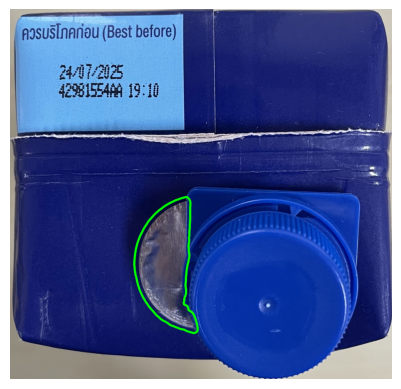

In [269]:
roi_contour = cv2.drawContours(cropped_image.copy(), template_contour_result, -1, (0, 255, 0), 10)

plt.imshow(roi_contour[:,:,::-1])
plt.axis('off')